# Generowanie zmiennych losowych o dowolnym rozkładzie w Pythonie. Dyskretne zmienne losowe wielowymiarowe w Pythonie.

## Metoda odwracania dystrybuanty

Istnieje wiele różnych metod generowania liczb losowych o zadanym rozkładzie prawdopodobieństwa. Dzisiaj omówimy jedną z nich - będzie to metoda odwracania dystrybuanty.

### Dystrybuanta i dystrybuanta empiryczna

Przypomnijmy najpierw, że dystrybuanta jest jedną z funkcji, za pomocą której można zdefiniować rozkład prawdopodobieństwa zmiennej losowej. Zgodnie z definicją dystrybuantę zmiennej losowej $X$ liczymy ze wzoru:

$$ F_{X}(x)=\mathbb{P}(X\le x) = \mathbb{P}(X^{-1}\left((-\infty,x]\right)),$$

dla dowolnego $ x\in\mathbb{R}$. Ponadto, jeśli zmienna losowa $X$ jest dyskretna, a jej zbiór atomów to $A=\{a_1,a_2,\ldots\}$, to 

$$F_{X}(x)=\sum_{a\in A, a\le x}\mathbb{P}(X=a). $$

Chcąc zbadać, jak wygląda rozkład pewnej zmiennej losowej na podstawie próbki, możemy spróbować oszacować właśnie dystrybuantę. W tym celu definiujemy tzw. **dystrbuantę empiryczną**.

**Definicja (dystrybuanta empiryczna)**

Niech $x_1,x_2,\ldots, x_n$ będzie próbką wylosowaną z rozkładu o dystrybuancie $F$. Funkcję $\hat{F}:\mathbb{R}\rightarrow [0,1]$ zdefiniowaną wzorem

$$\hat{F}(x)=\frac{1}{n}\sum_{i=1}^n\pmb{1}_{(-\infty,x]}(x_i)=\frac{\#\{i:x_i\leq x\}}{n}$$

nazywamy **dystrybuantą empiryczną**.

Innymi słowy, chcąc wyznaczyć wartość dystrybuanty empirycznej w punkcie $x$ sprawdzamy, ile wyników z naszej próbki jest mniejszych lub równych od $x$ i porównujemy tę liczbę z całkowitą liczbą otrzymanych wyników.

Chcąc wyznaczyć dystrybuantę empiryczną w Pythonie, możemy posłużyć się funkcją `ecdf(x)` z pakietu `stats` z biblioteki `scipy`. Argumentem tej funkcji jest wektor próbek. Załóżmy, że `f` jest dystrybuantą empiryczną wygenerowaną za pomocą polecenia `ecdf(x)`. Wówczas możemy badać jej właściwości za pomocą następujących poleceń:

* `f.cdf.quantiles` - zwraca wektor unikalnych wartości w próbce,
* `f.cdf.probabilities` - zwraca wektor skumulowanych prawdopodobieństw związanych z wartościami z poprzedniego podpunktu,
* `f.cdf.evaluate(t)` - zwraca wartość dystrybuanty empirycznej w punkcie $t$,
* `f.cdf.plot(ax)` - rysuje wykres dystrybuanty empirycznej na zadanych osiach.

**Przykład 1**

Załóżmy, że w $10$ rzutach czworościenną kostką do gry otrzymaliśmy następujące wyniki: $1, 1, 4, 1, 3, 2, 2, 1, 4, 4$. Na podstawie otrzymanych wyników wyznacz dystrybuantę empiryczną zmiennej losowej $X$ oznaczającej liczbę wyrzuconych oczek w rzucie czworościenną kostką. Następnie zbadaj własności tej dystrybuanty i zwizualizuj ją na wykresie.

Wartości otzymane w eksperymencie: [1. 2. 3. 4.]
Skumulowane prawdopodobieństwa dla otrzymanych wartości: [0.4 0.6 0.7 1. ]
Wartości dystrybuany empirycznej w punktach 0, 2, 3.5: 0.0 0.7 1.0


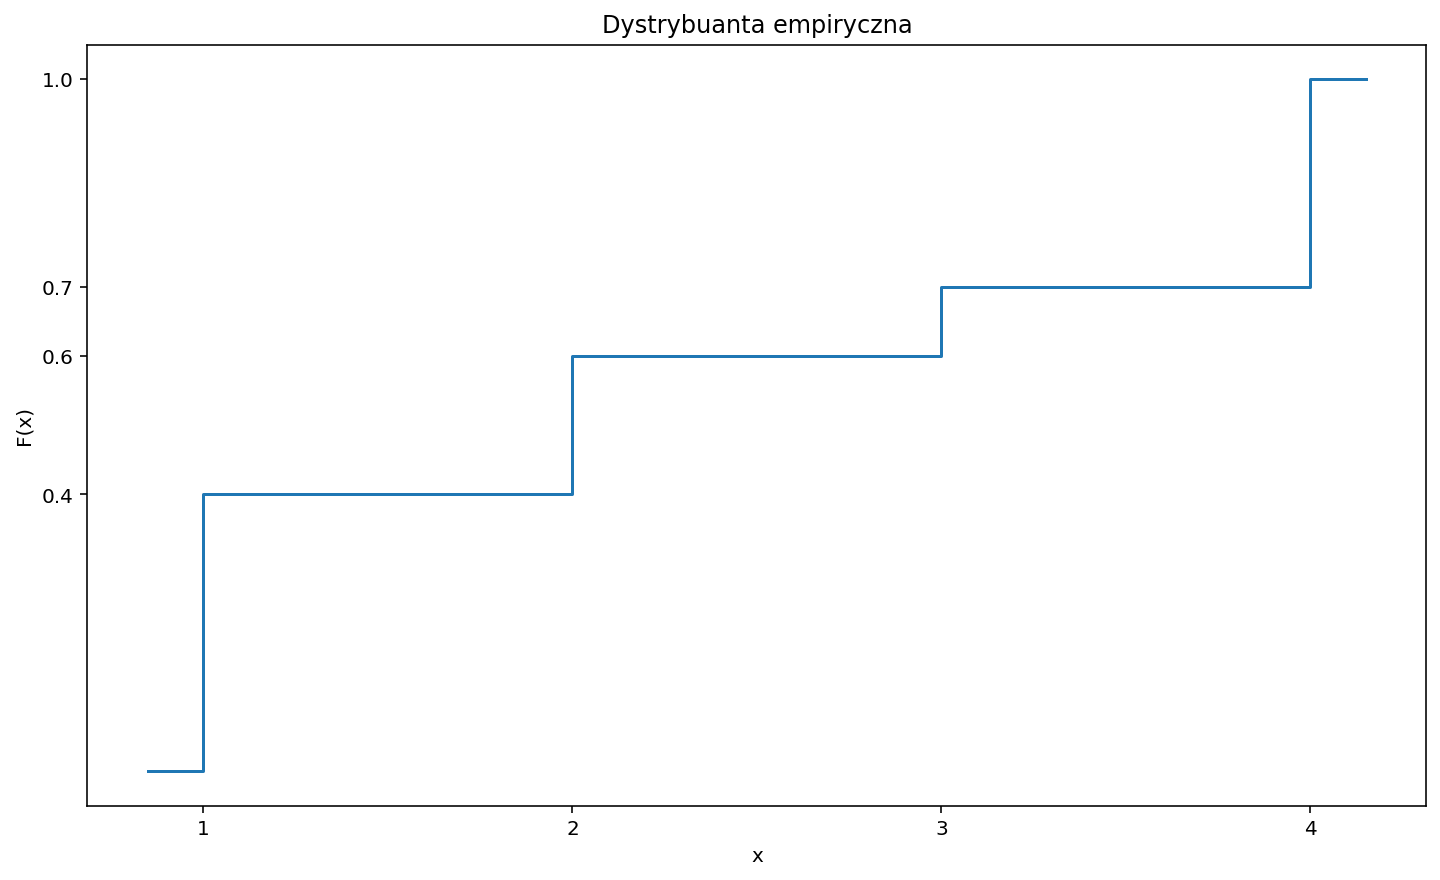

In [3]:
from scipy import stats
import matplotlib.pyplot as plt

# Wprowadzamy dane z zadania i generujemy dystrybuantę empiryczną
x = [1, 1, 4, 1, 2, 2, 3, 1, 4, 4]
f = stats.ecdf(x)

# Badamy własności otrzymanej funkcji
x = f.cdf.quantiles
print('Wartości otzymane w eksperymencie:', x)
p = f.cdf.probabilities
print('Skumulowane prawdopodobieństwa dla otrzymanych wartości:', p)
print('Wartości dystrybuany empirycznej w punktach 0, 2, 3.5:', f.cdf.evaluate(0),f.cdf.evaluate(3),f.cdf.evaluate(5))

# Rysujemy wykres dystrybuanty empirycznej
os = plt.subplot()
f.cdf.plot(os)
plt.title('Dystrybuanta empiryczna')
plt.xlabel('x')
plt.ylabel('F(x)')
plt.xticks(x)
plt.yticks(p)
plt.show()

### Dystrybuanta pseudoodwrotna

Metoda odwracania dystrybuanty opiera się na następującym twierdzeniu:

**Twierdzenie (metoda odwracania dystrybuanty)**

Niech $F$ będzie dystrybuantą pewnej zmiennej losowej, a $U$ będzie zmienną losową o rozkładzie jednostajnym na odcinku $(0,1)$. Jeśli $F^{-1}$ jest funkcją odwrotną do $F$, to  funkcja $X=F^{-1}(U)$ jest zmienną losową o dystrybuancie $F$.

Niestety, nie wszystkie zmienne losowe mają dystrybuanty, które są funkcjami odwracalnymi. Dlatego w praktyce będziemy korzystać z tzw. dystrybuanty pseudoodwrotnej, którą możemy zdefiniować dla dowolnej zmiennej losowej.

**Definicja (dystrybuanta pseudoodwrotna)**

Niech $F:\mathbb{R}\rightarrow [0,1]$ będzie dystrybuantą zmiennej losowej $X$. Wtedy funkcję $F^-:(0,1)\rightarrow \mathbb{R}$ definiowaną wzorem

$$F^-(u)=\inf\{x:F(x)\geq u\}$$

nazywamy **dystrybuantą pseudoodwrotną**.

Jeśli $F$ jest dystrybuantą, która posiada funkcję odwrotną $F^{-1}$, to $F^-=F^{-1}$.

**Twierdzenie (ogólna metoda odwracania dystrybuanty)**

Niech $F$ będzie dystrybuantą pewnej zmiennej losowej, a $U$ będzie zmienną losową o rozkładzie jednostajnym na odcinku $(0,1)$. Jeśli $F^-$ jest dystrybuantą pseudoodwrotną do $F$, to  funkcja $X=F^-(U)$ jest zmienną losową o dystrybuancie $F$.

Powyższe twierdzenia stanowią podstawę następującego algorytmu, który pozwala generować zmienne losowe o dowolnym rozkładzie.

**Algorytm (Generowanie zmiennych losowych przez odwracanie dystrybuanty)**

1. Generujemy $n$ liczb pseudolosowych $u_1,u_2,\ldots,u_n$ z rozkładu jednostajnego na odcinku $(0,1)$.
2. Obliczamy $x_i=F^-(u_i)$ dla $i=1,2,\ldots,n$.

Przypomnijmy, że do generowania liczb pseudolosowych o rozkładzie jednostajnym $U(0,1)$ możemy użyć polecenia `uniform.rvs(size=n)` z pakietu `scipy.stats`, gdzie $n$ jest rozmiarem próbki, którą chcemy otrzymać.

**Przykład 2**

 Niech $X$ będzie zmienną losową o dystrybuancie $F:\mathbb{R}\rightarrow [0,1]$ danej wzorem:
 
 $$F(x)=\begin{cases} 0, &\text{ dla }x<0,\\
x^2, &\text{ dla } x\in[0,1],\\
1, &\text{ dla } x>1.\end{cases}$$

Wygeneruj $100$ liczb zgodnie z rozkładem zmiennej losowej $X$. Następnie wyznacz dystrybuantę empiryczną na podstawie otrzymanej próbki i porównaj ją z rzeczywistą dystrybuantą zmiennej losowej $X$.

Wyznaczmy najpierw dystrybuantę pseudoodwrotną do dystrybuanty $F$. Niech $u\in (0,1)$. Wówczas:

$$F^-(u)=\inf\{x:F(x)\geq u\}=\inf\{x:x>0\wedge x^2\geq u\}=\sqrt{u}.$$

Zobaczmy, jak możemy wykorzystać dystrybuantę pseudoodwrotną do generowania liczb o rozkładzie zgodnym z rozkładem zmiennej losowej $X$.

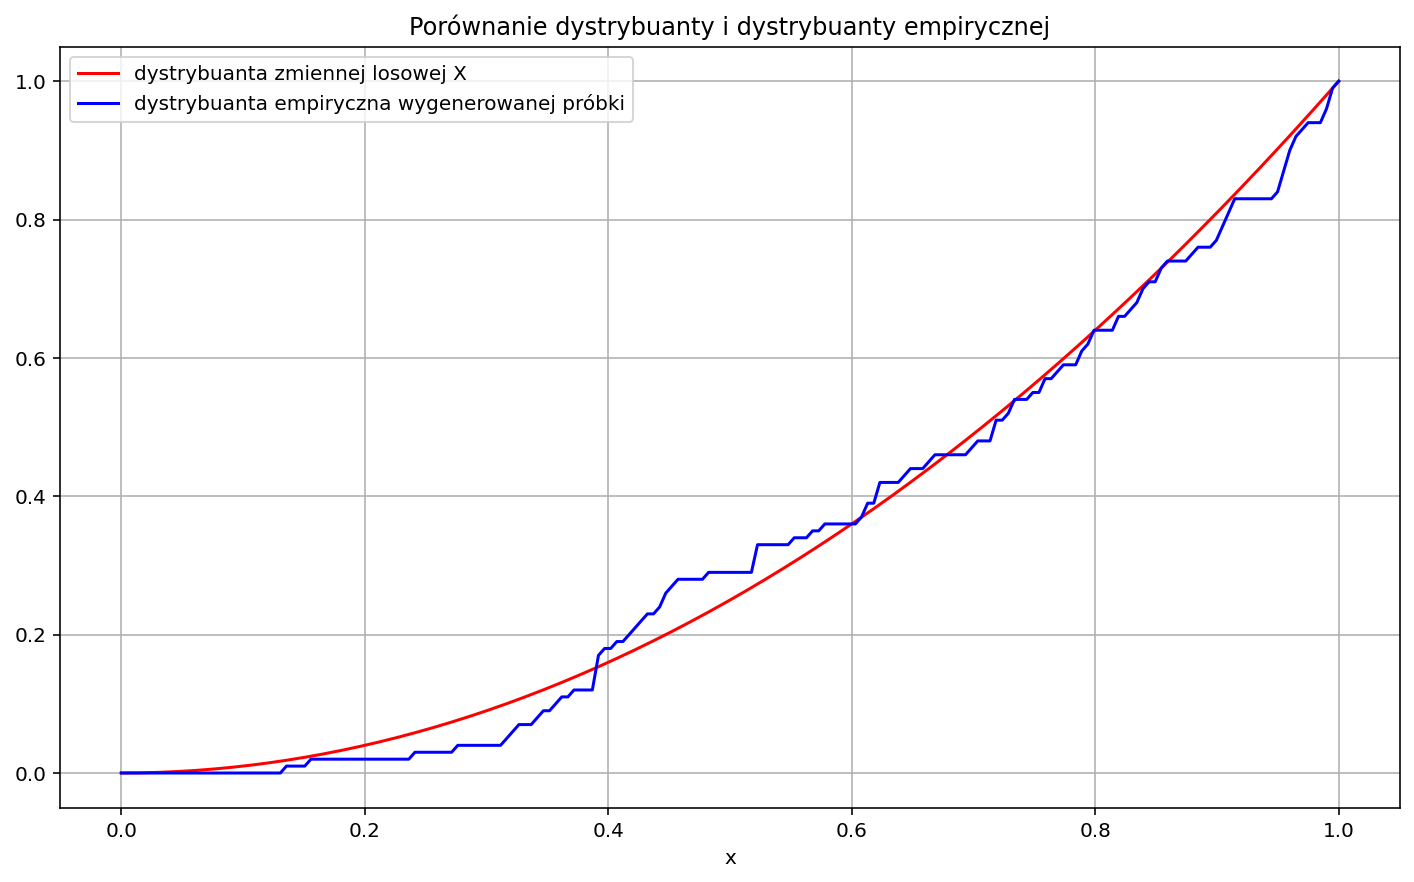

In [4]:
import numpy as np

# Definiujemy dystrybuantę pseudoodwrotną
def F_pseudoinverse(u):
    x = [i**(1/2) for i in u]
    return x

# Generujemy 100 liczb o rozkładzie zgodnym z rozkładem zmiennej losowej X, używając dystrybuanty pseudoodwrotnej
u = stats.uniform.rvs(size=100)
probki = F_pseudoinverse(u)

# Wyznaczamy dystrybuantę empiryczną na podstawie wygenerowanej próbki
F_empirical = stats.ecdf(probki)

# Narysujemy wykresy dystrybuanty zmiennej losowej i dystrybuanty empirycznej
x = np.linspace(0, 1, 200)
y1 = [i**2 for i in x]
y2 = F_empirical.cdf.evaluate(x)

plt.plot(x, y1, label='dystrybuanta zmiennej losowej X', color='red')
plt.plot(x, y2, label='dystrybuanta empiryczna wygenerowanej próbki', color='blue')
plt.title('Porównanie dystrybuanty i dystrybuanty empirycznej')
plt.xlabel('x')
plt.legend()
plt.grid()
plt.show()

**Przykład 3**

Załóżmy, że $X$  jest zmienną losową o następującym rozkładzie:


| $k$ | $0$ | $1$ |
| --- | --- | --- |
| $\mathbb{P}(X=k)$ | $0{,}8$ | $0{,}2$ | 

Znajdź dystrybuantę i dystrybuantę pseudoodwrotną dla tej zmiennej losowej. Następnie wygeneruj próbkę $100$ liczb zgodnie z rozkładem zmiennej losowej $X$, używając metody odwracania dystrybuanty i porównaj rozkład otrzymanych liczb z rozkładem tej zmiennej losowej.

Zacznijmy od wyznaczenia wzoru dystrybuanty:

$$F(x)=\begin{cases}
0, &\text{ dla } x<0,\\
0{,}8, &\text{ dla } 0\leq x<1,\\
1, &\text{ dla } 1\leq x.
\end{cases}$$

Przejdziemy teraz do dystrybuanty pseudoodwrotnej. Spróbujemy najpierw wyznaczyć jej wartość w przykładowym punkcie $u=0{,}1$. Zgodnie z definicją dystrybuanty pseudoodwrotnej musimy znaleźć możliwie najmniejszą liczbę rzeczywistą $x$, dla której zachodzi nierówność $F(x)\geq u$. Patrząc na wzór dystrybuanty, możemy łatwo zauważyć, że taką liczbą będzie $x=0$. Możemy też łatwo stwierdzić, że dystrybuanta pseudoodwrotna będzie przyjmować wartość $0$ dla wszystkich argumentów $0< u\leq 0{,}8$. W podobny sposób możemy wyznaczyć pozostałą część wzoru na dystrybuantę pseudoodwrotną:

$$F^-(u)=\begin{cases}
0, &\text{ dla } 0<u\leq 0{,}8,\\
1, &\text{ dla } 0{,}8<u\leq 1.
\end{cases}$$

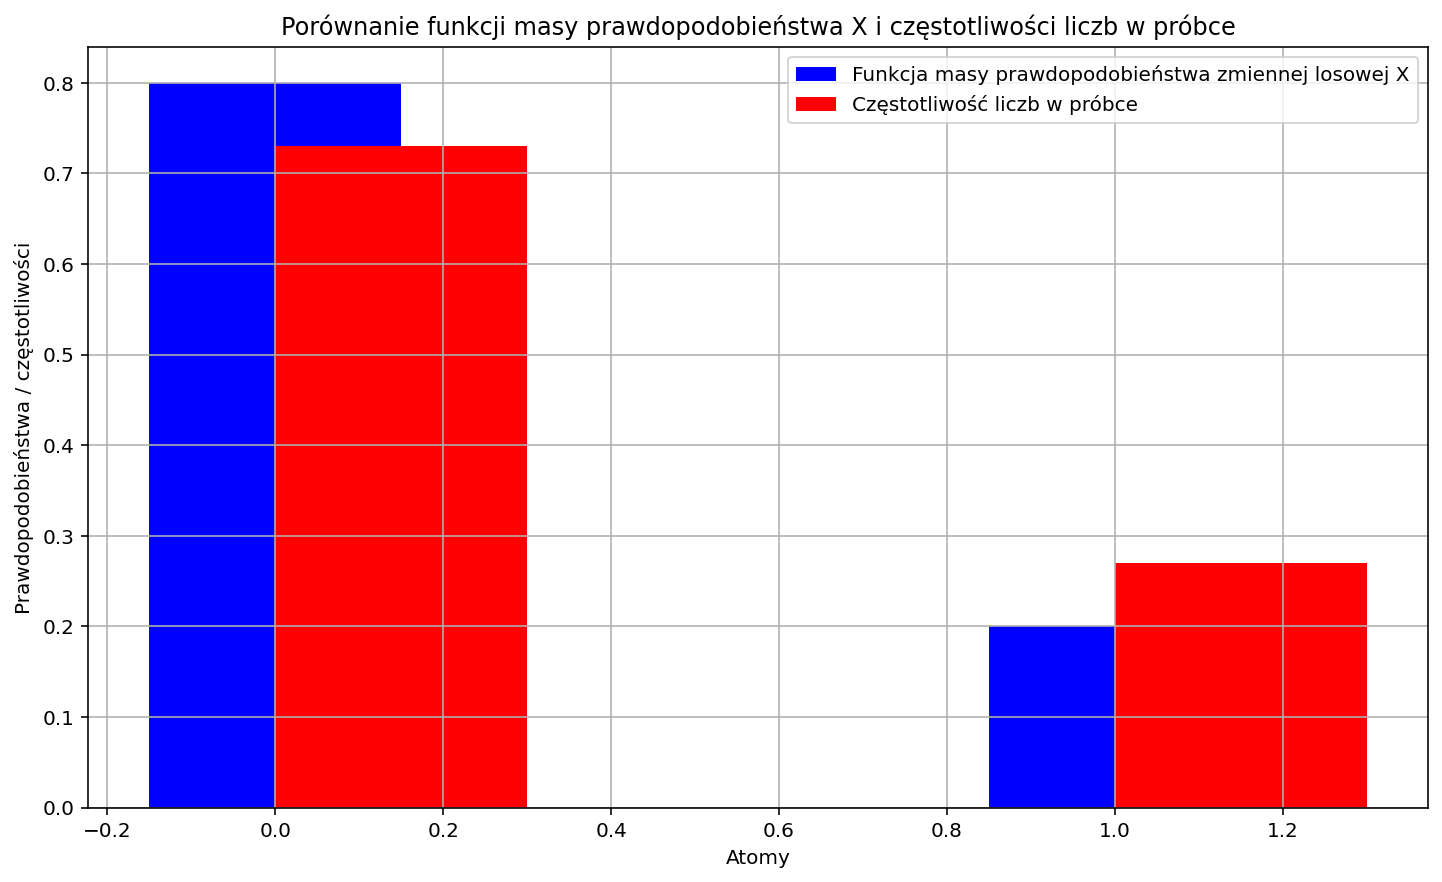

In [5]:
# Definiujemy dystrybuantę zmiennej losowej X
def F(x):
    n = len(x)
    y = [0]*n
    for i in range(n):
        if x[i] < 0:
            y[i] = 0
        elif x[i] < 1:
            y[i] = 0.8
        else:
            y[i] = 1
    return y

# Definiujemy dystrybuantę pseudoodwrotną zmiennej losowej X
def F_inv(u):
    n = len(u)
    y = [0]*n
    for i in range(n):
        if u[i] < 0.8:
            y[i] = 0
        else:
            y[i] = 1
    return y

# Generujemy próbkę 100 liczb używając metody odwracania dystrybuanty
u = stats.uniform.rvs(size=100)
probki = F_inv(u)

# Aby porównać rozkład zmiennej losowej X z rozkładem wylosowanych liczb możemy porównać funkcję masy prawdopodobieństwa zmiennej losowej X z częstotliwością wylosowanych liczb
atomy = [0, 1]
pr = [0.8, 0.2]

jedynki = np.count_nonzero(probki)
zera = 100 - jedynki
czestotliwosc = [zera/100, jedynki/100]

plt.bar(atomy, pr,label='Funkcja masy prawdopodobieństwa zmiennej losowej X', width=0.3, color='blue', align='center')
plt.bar(atomy, czestotliwosc, label='Częstotliwość liczb w próbce', width=0.3, color='red', align='edge')
plt.legend()
plt.xlabel('Atomy')
plt.ylabel('Prawdopodobieństwa / częstotliwości')
plt.title('Porównanie funkcji masy prawdopodobieństwa X i częstotliwości liczb w próbce')
plt.grid()
plt.show()

Ogólnie, w przypadku zmiennej losowej dyskretnej o rozkładzie $\mathbb{P}(X=x_i)=p_i$ dla $i=1,2,\ldots,n$ dystrybuantę pseudoodwrotną możemy przedstawić graficznie w następujący sposób:

![image](dystr_odwrotna.png)

Zatem jeśli chcemy znaleźć wartość $F^-(u)$, możemy podzielić przedział $(0,1)$ na mniejsze przedziały, których długości są równe kolejnym wartościom $p_i$ i które odpowiadają kolejnym atomom $x_i$. Następnie wystarczy sprawdzić, do którego z przedziałów należy $u$.

## Dyskretne zmienne losowe wielowymiarowe

W celu badania dyskretnych zmiennych losowych wielowymiarowych w Pythonie, będziemy posługiwać się macierzami, czyli obiektami klasy `ndarray`. Sposób ich generowania został już omówiony na początku poprzedniego przewodnika *03LRAP*. Warto jednak znać klika innych przydatnych funkcji z biblioteki NumPy. 

* `A.sum(axis=k)` - jeśli *A* jest obiektem klasy `ndarray`, to ta funkcja zwróci sumy elementów tej macierzy. Opcjonalny argument `axis` pozwala sumować elementy z poszczególnych kolumn (jeśli $k=0$) lub wierszy (jeśli $k=1$);
* `numpy(A, weights=None)` - oblicza średnią wartość elementów z macierzy *A*. W opcjonalnym argumencie `weights` możemy podać wagi, aby wyznaczyć średnią ważoną. Wagi powinny być podane jako macierz liczb o tych samych wymiarach, co macierz *A*.

**Przykład 4**

Dany jest dyskretny wektor losowy $(X,Y)$ o rozkładzie podanym w poniższej tabeli:

| $X$ \ $Y$ | $1$ | $2$ | $3$ | $4$ |
| --- | --- | --- | --- | --- |
| $-2$ | $0{,}1$ | $0{,}2$ | $0$ | $0{,}1$ |
| $2$ | $0{,}3$ | $0$ | $0{,}2$ | $0{,}1$ |

* Znajdź rozkład brzegowy zmiennej losowej $Y$.
* Oblicz $\mathbb{E}Y$ oraz $Var(Y)$.
* Oblicz $\mathbb{E}(\sqrt{|XY|})$.


In [10]:
# Definiujemy wektory atomów zmiennych losowych X i Y oraz tabelkę z prawdopodobieństwem łącznym
atomy_X = np.array([[-2], [2]])
atomy_Y = np.array([[1, 2, 3, 4]])
pr_laczne = np.array([[0.1, 0.2, 0, 0.1], [0.3, 0, 0.2, 0.1]]) # Zakładamy, że wiersze tej tabeli odpowiadają atomom zmiennej losowej X, a kolumny atomom zmiennej losowej Y

# Szukamy rozkładu brzegowego zmiennej losowej Y
pr_Y = np.array([pr_laczne.sum(axis=0)])
print('Rozkład brzegowy zmiennej losowej Y:')
for k in range(4):
    print('P(Y=', atomy_Y[0, k], ')=', pr_Y[0, k], sep="")
    
# Szukamy EY oraz Var(Y)
EY = np.average(atomy_Y, weights=pr_Y)
print('EY=', EY, sep="")
EY2 = np.average(atomy_Y**2, weights=pr_Y)
VarY = EY2 - EY**2
print('Var(Y)=', VarY, sep="")

# Szukamy E(sqrt(|XY|)). Skorzystamy z ,,prawa leniwego statystyka''
XY = np.dot(abs(atomy_X)**(1/2), atomy_Y**(1/2)) # pomocnicza tabelka, która zawiera wszystkie iloczyny postaci (pierwiastek z |x_i|)*(pierwiastek z y_j), gdzie x_i, y_j to odpowiednio atomy zmiennych losowych X i Y
E = np.average(XY, weights=pr_laczne)
print('E(sqrt(|XY|))=', E, sep="")

Rozkład brzegowy zmiennej losowej Y:
P(Y=1)=0.4
P(Y=2)=0.2
P(Y=3)=0.2
P(Y=4)=0.2
EY=2.2
Var(Y)=1.3599999999999994
E(sqrt(|XY|))=2.021268798455112
